In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"




columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'cname']



df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?') 



 
# 결측값 처리 (horsepower 컬럼에 결측값 존재)
df = df.dropna()

해당 소스를 활용하여 연비(Mile per gallen)를 예측 

mse를 구하라



1. ML (RF, DT, LR)

2. FCNN

3. 순환데이터로 변환후 CNN



각 단계별 검사후 다음단계 진행

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras




url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"



columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','cname']



df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?') 






C:\Users\tyra\AppData\Local\Temp\ipykernel_19060\3726812448.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')


In [3]:
df


 
# 결측값 처리 (horsepower 컬럼에 결측값 존재)
df = df.dropna()




#해당 소스를 활용하여 연비(Mile per gallen)를 예측 

#mse를 구하라

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,cname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [5]:
# 컬렴명 확인
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'cname'],
      dtype='object')

Text(0.5, 1.0, 'mile per gallen')

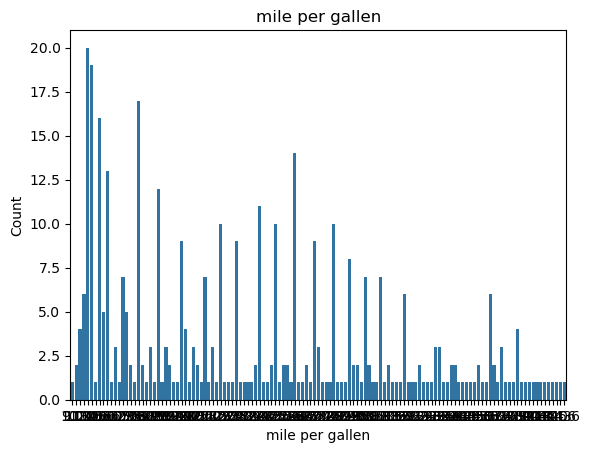

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="mpg") #df 데이터프레임에서 label 열의 값을 기준으로 각 레이블의 빈도수를 계산해 막대 그래프를 생성
plt.xlabel("mile per gallen") 
plt.ylabel("Count")
plt.title("mile per gallen") #그래프의 제목을 "Label"로 설정

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
cname           0
dtype: int64

C:\Users\tyra\AppData\Local\Temp\ipykernel_19060\2283425298.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax) #df.hist()는 **데이터프레임의 각 열(Column)**에 대해 자동으로 히스토그램을 그리는 함수입니다. df에 있는 모든 수치형 컬럼에 대해 각각의 히스토그램을 생성함. ax = ax는 앞서 만든 축(ax)에 모든 히스토그램을 그리도록 설정한 부분


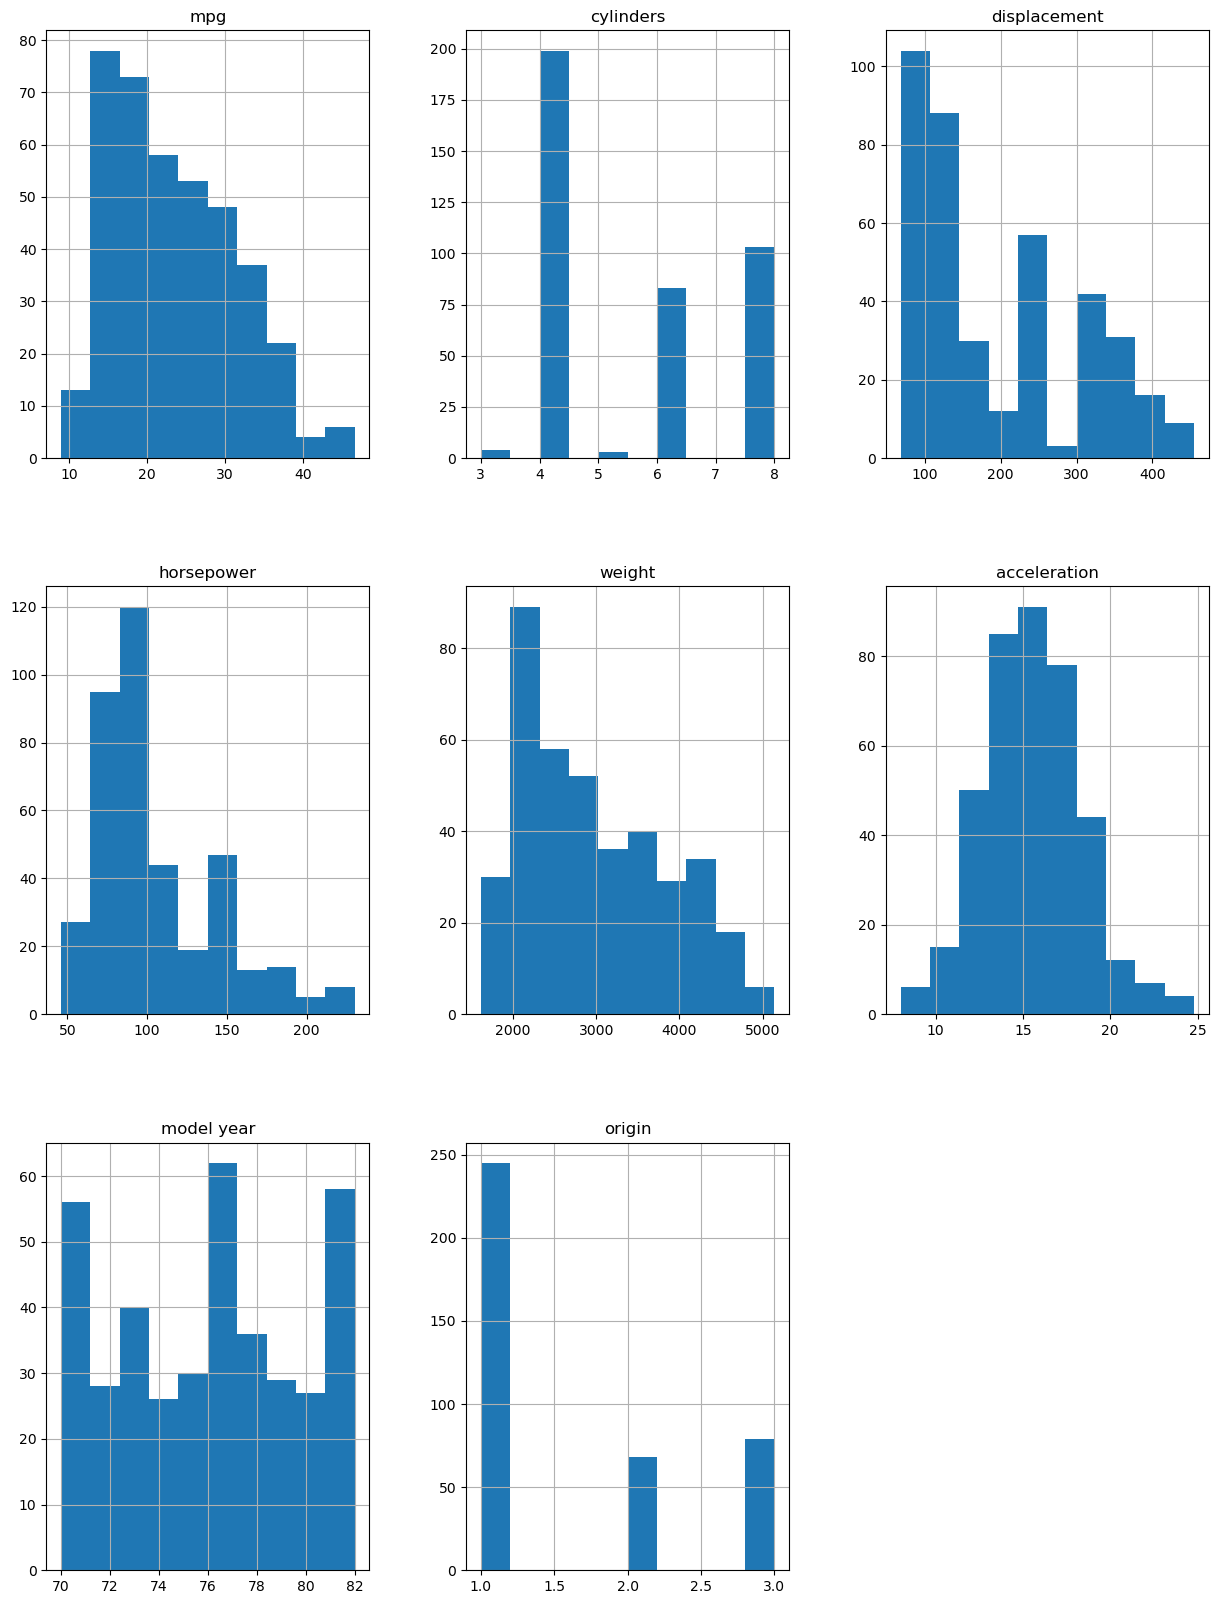

In [8]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20)) #plt.figure()는 새로운 그림(Figure)을 생성하는 함수입니다. figsize=(15,20)는 그래프의 전체 크기를 설정합니다
ax = fig.gca() #gca()는 **현재의 축(Axes)**를 반환하는 함수
df.hist(ax = ax) #df.hist()는 **데이터프레임의 각 열(Column)**에 대해 자동으로 히스토그램을 그리는 함수입니다. df에 있는 모든 수치형 컬럼에 대해 각각의 히스토그램을 생성함. ax = ax는 앞서 만든 축(ax)에 모든 히스토그램을 그리도록 설정한 부분
plt.show()

In [9]:
df= df.drop('cname',axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [10]:
X=df.drop('mpg',axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
y = df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12) #X는 입력데이터(특성 혹은 특성들. 테이블의 열), y는 정답값(레이블)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#ex. 훈련 세트 :(16512, 8) (16512,)
#X_train.shape = (16512, 8): X_train은 16,512개의 샘플(데이터 행)과 8개의 특징(열)
#y_train.shape = (16512,):y_train은 16,512개의 정답값(레이블)을 나타냄. 근데 (정답갑, 정답값의 개수)로 여기는 정답갑의 개수가 딱 하나인거임, 다중 출력이나 다중 레이어 문제가 아니라서

(313, 7) (313,)
(79, 7) (79,)


# RF

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 11.761020683544295


# DT

In [14]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 15.883164556962027


# LR

In [17]:
#Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 14.153697740101117
